In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\SUMEET\Documents\Python\Project\dataset_full.csv")

# EDA

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


## 1.Missing Values

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

## 2.Numerical Features -

a. Continuous Features

b. Discrete Features

## Discrete Features

In [6]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique())<=25]

In [7]:
len(discrete_features)

95

In [8]:
# All features are numerical
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']

## Continuous features

In [9]:
continuous_features = list(set(numerical_features) - set(discrete_features))

In [10]:
len(continuous_features)

17

In [11]:
continuous_features

['directory_length',
 'qty_percent_params',
 'ttl_hostname',
 'length_url',
 'qty_percent_url',
 'time_domain_expiration',
 'qty_hyphen_url',
 'qty_percent_directory',
 'qty_vowels_domain',
 'params_length',
 'time_domain_activation',
 'qty_percent_file',
 'file_length',
 'qty_hyphen_params',
 'time_response',
 'domain_length',
 'asn_ip']

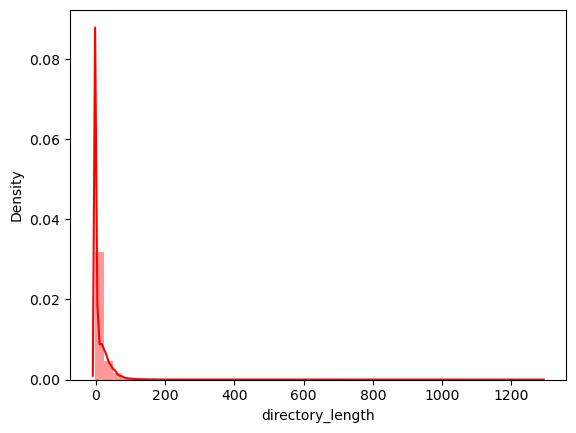

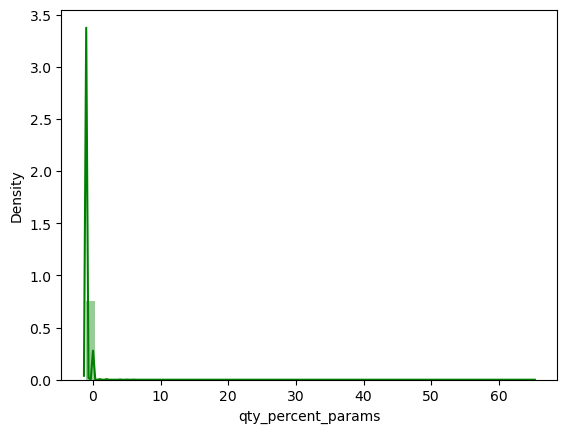

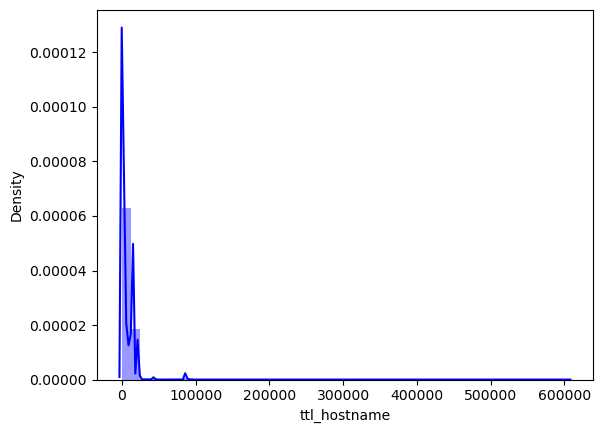

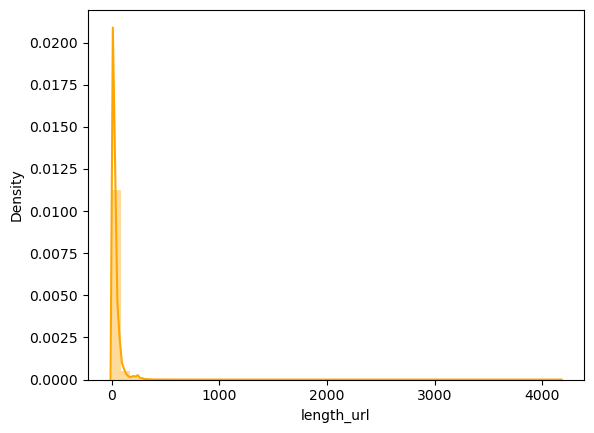

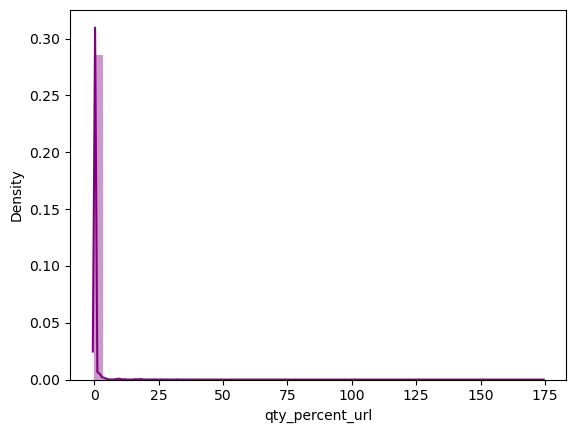

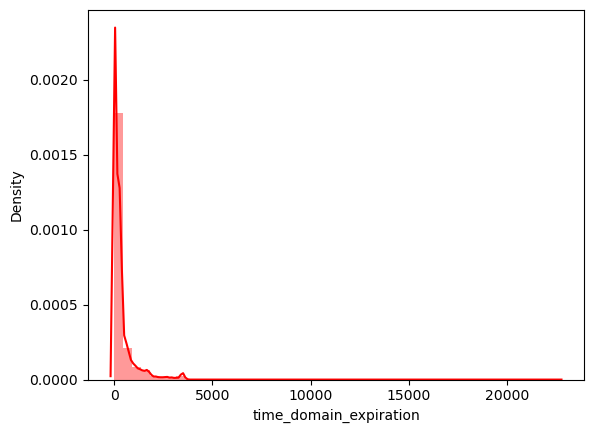

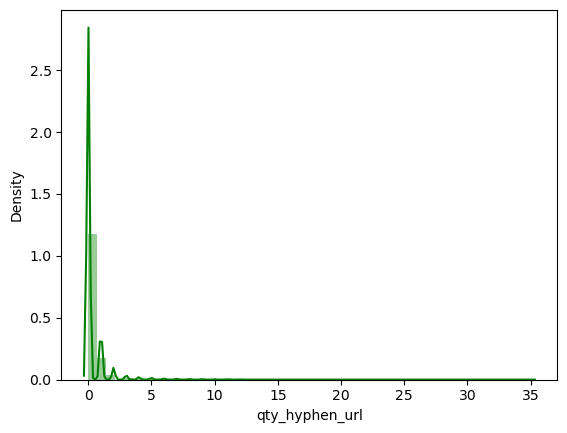

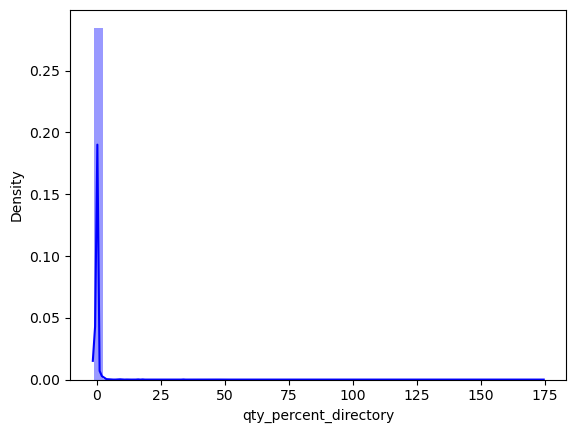

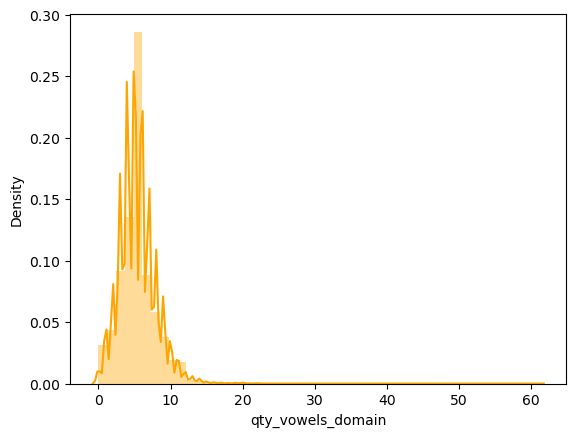

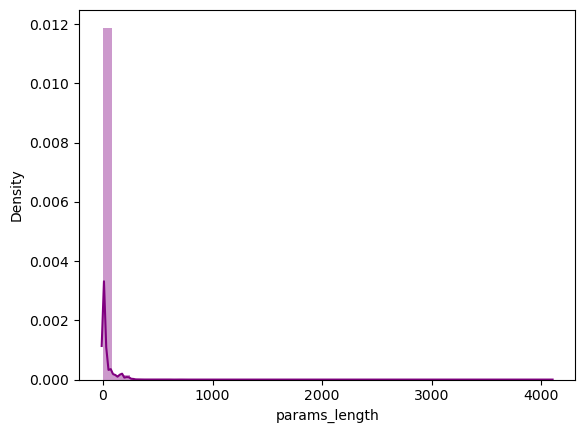

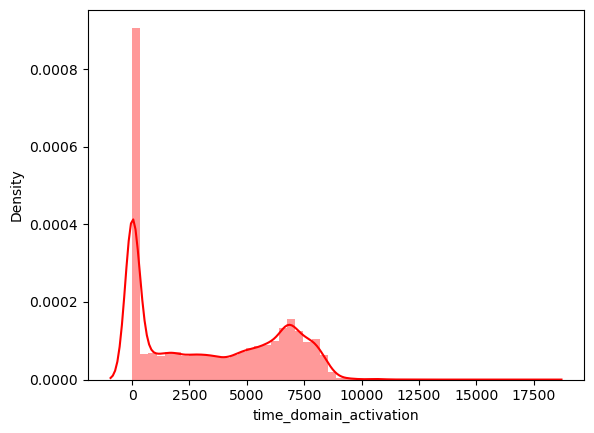

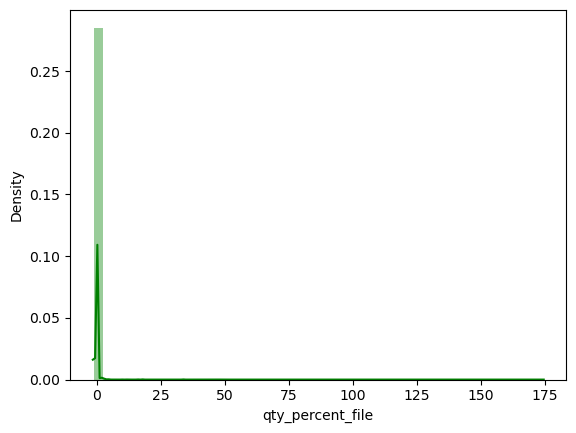

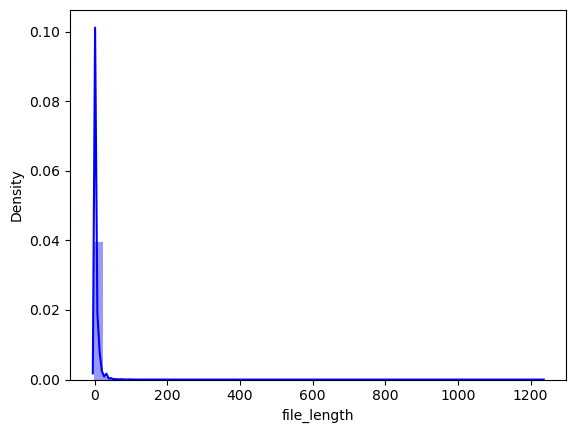

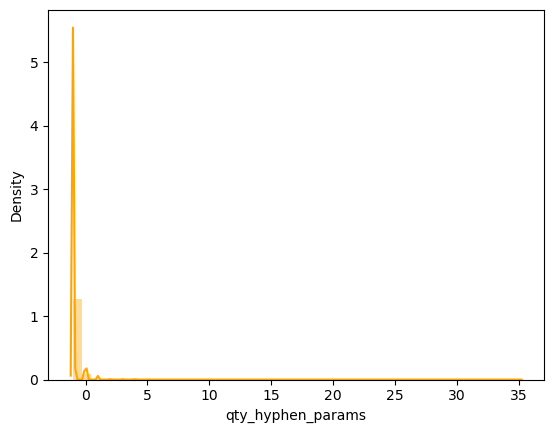

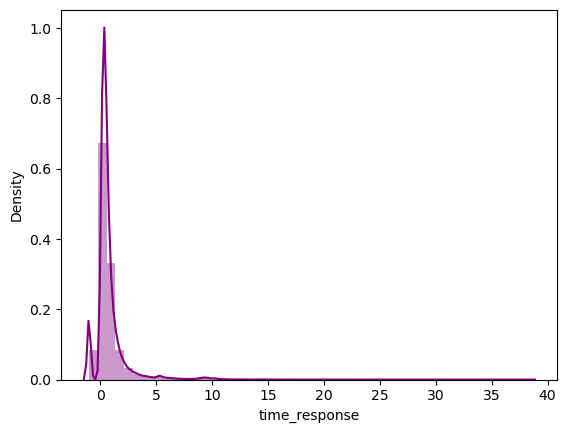

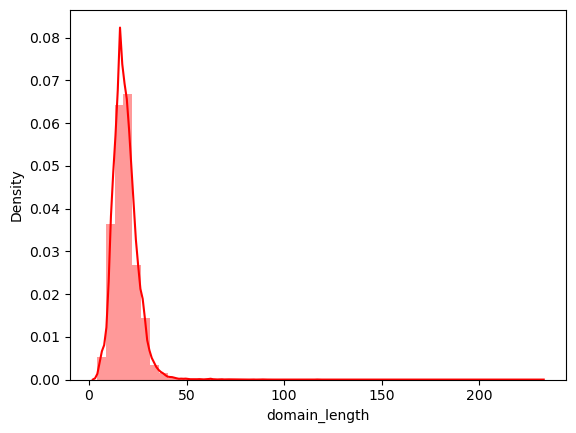

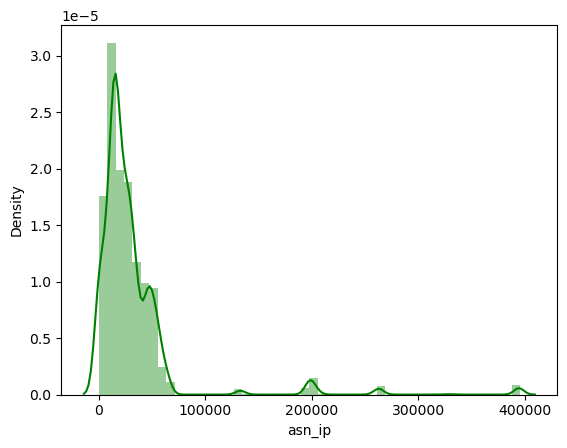

In [12]:
data = df.copy()
# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
i=0
for feature in continuous_features:
    sns.distplot(data[feature],color=colors[i%len(colors)])
    plt.show()
    i+=1

# Outliers Removal 

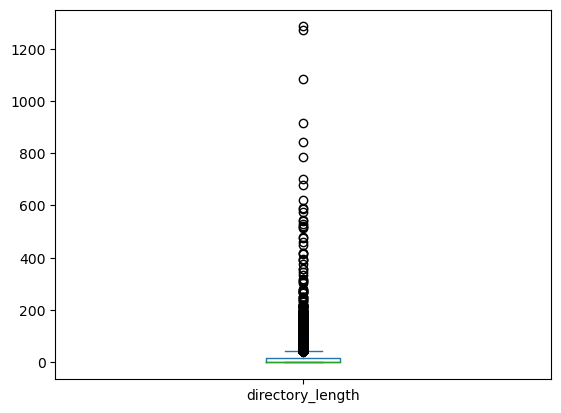

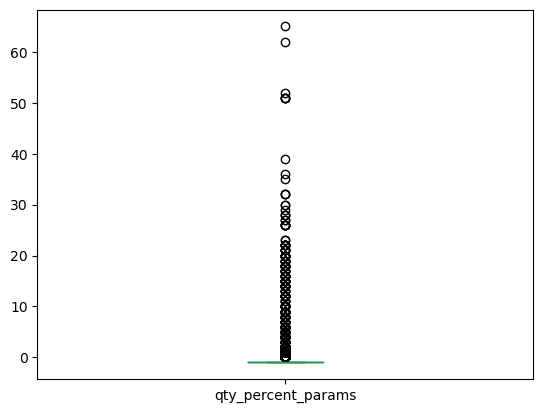

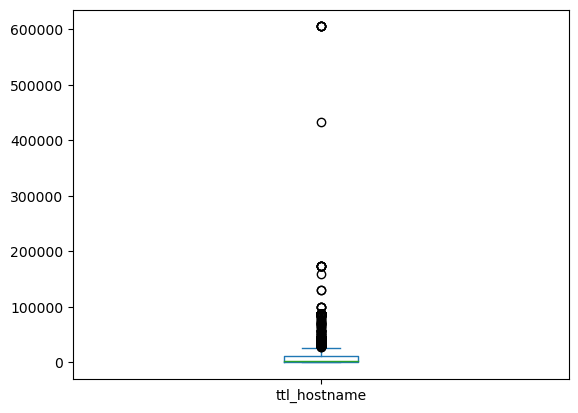

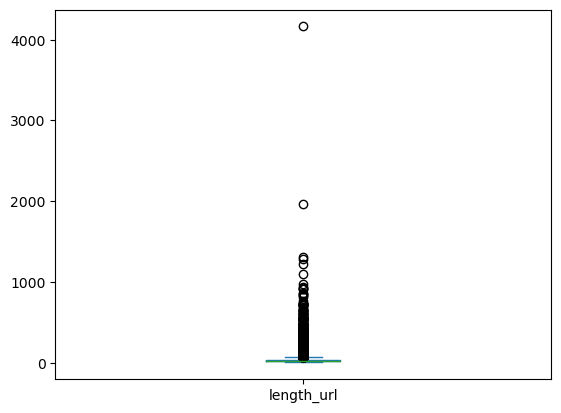

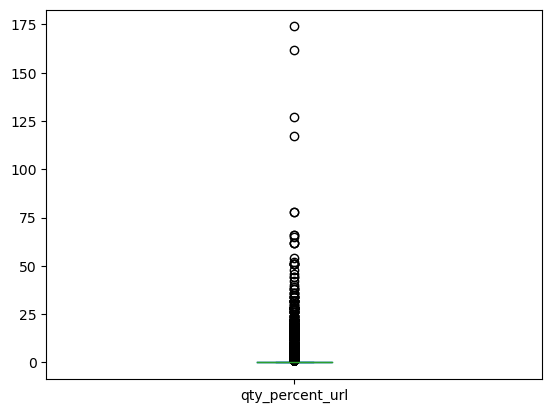

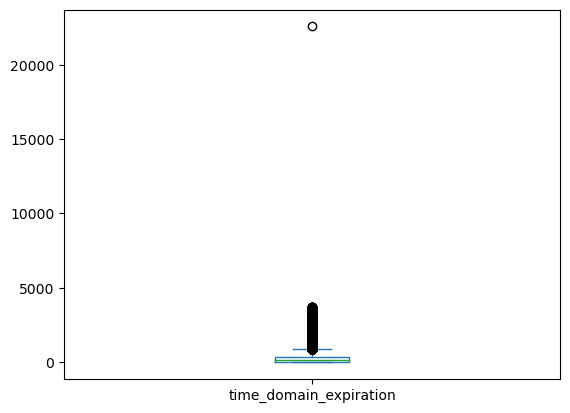

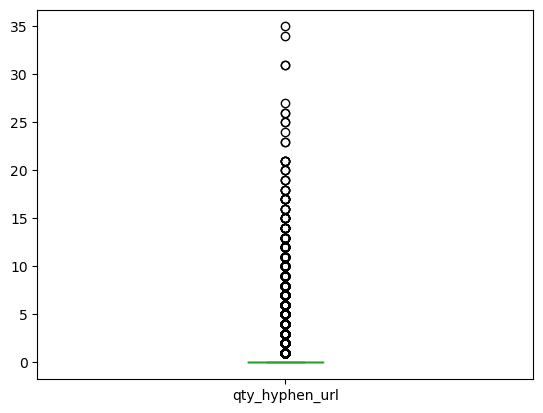

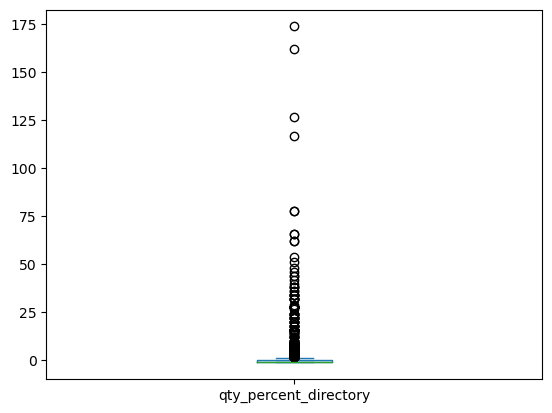

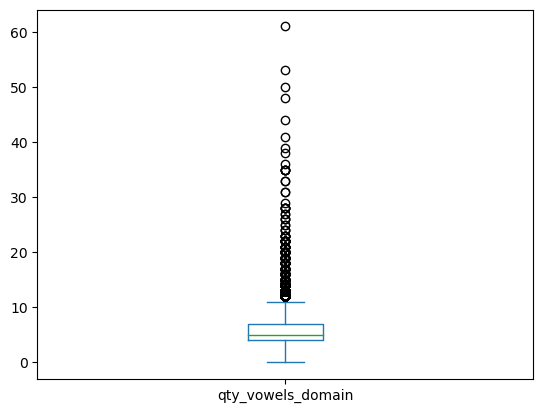

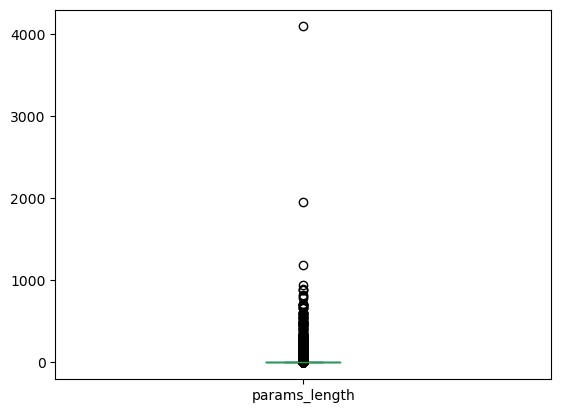

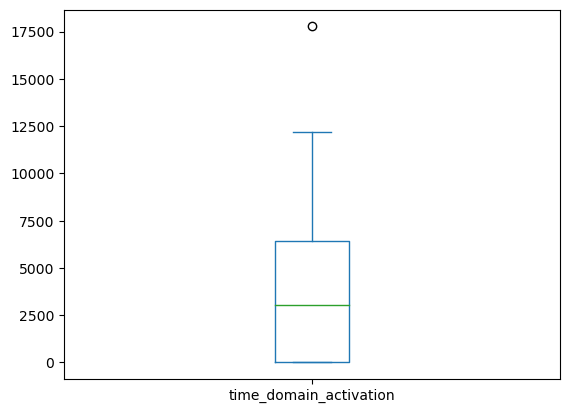

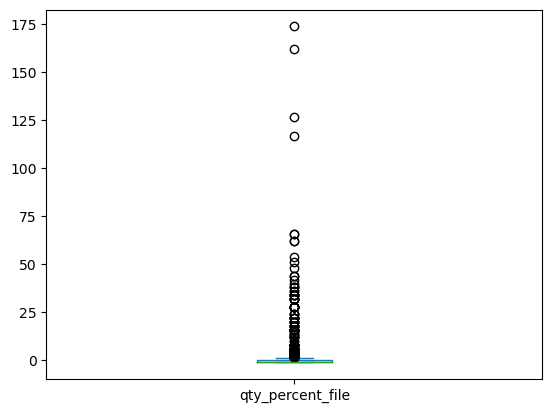

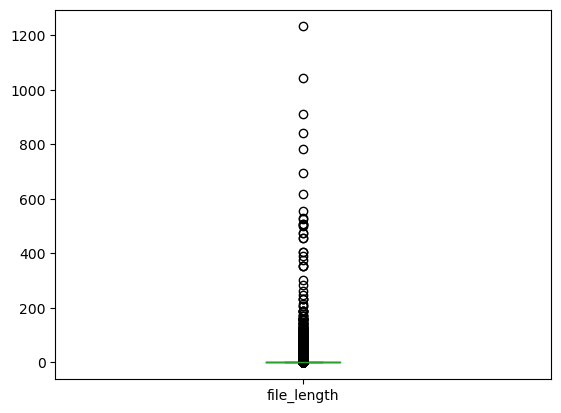

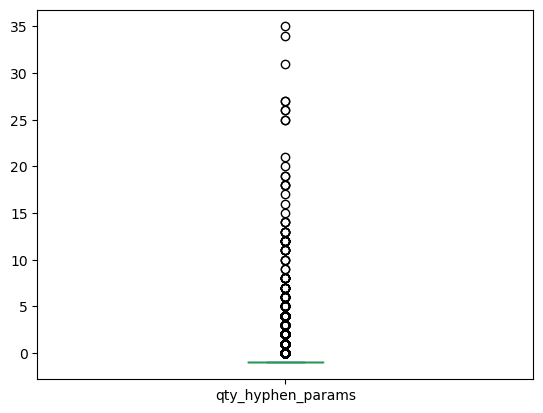

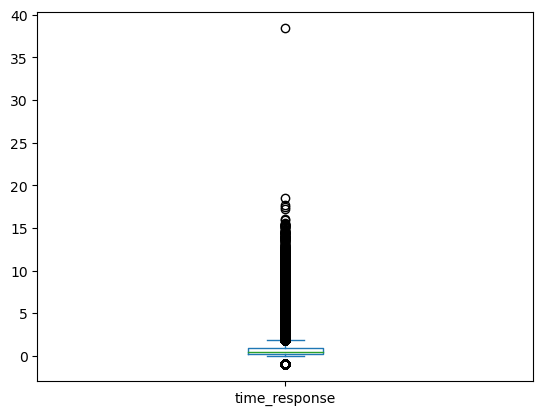

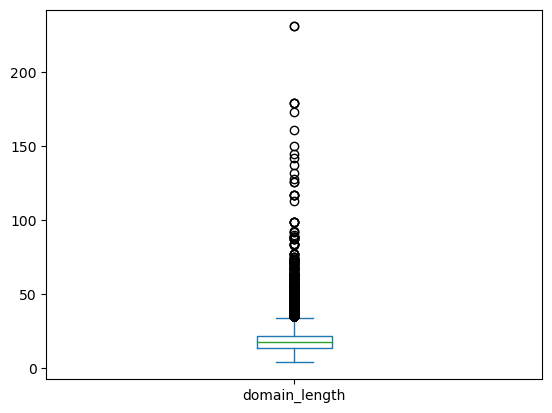

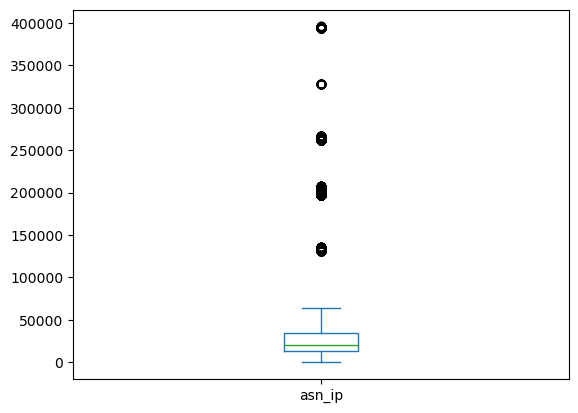

In [13]:
data = df.copy()
for feature in continuous_features:
    data[feature].plot.box()
    plt.show()

In [14]:
from scipy import stats

# Calculate Z-Scores for the Dataframe
z_scores = np.abs(stats.zscore(df))

# Define a threshold for outliers (e.g., 2 or 3 standard deviations)
threshold = 3

# Create a new DataFrame without outliers
df_no_outliers = df[(z_scores < threshold)]


In [15]:
df_no_outliers.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,892.0,0,0.0,0.0,0.0,0.0,1
1,5.0,0.0,1.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,...,1.0,2.0,1.0,9540.0,1,0.0,0.0,0.0,0.0,1
2,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,589.0,1,0.0,0.0,0.0,0.0,0
3,4.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,292.0,1,0.0,0.0,0.0,0.0,1
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3597.0,0,1.0,0.0,0.0,0.0,0


# Multicolinearity Removal

In [16]:

def get_high_correlation_feature(dataset, threshold):
    # Calculate correlation matrix
    corr_matrix = dataset.corr()
    # Find highly correlated feature pairs
    high_corr_features = set()
    for i in range(len(corr_matrix.columns)-1):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                feature_i = corr_matrix.columns[i]
                feature_j = corr_matrix.columns[j]
                high_corr_features.add(feature_i)
    return high_corr_features

high_corr_features=get_high_correlation_feature(df_no_outliers.iloc[:-1],0.85)

# Remove highly correlated features
for feature in df_no_outliers.columns[:-1]:
  if feature in high_corr_features:
     df_no_outliers.drop(feature, axis=1, inplace=True)

# Print the DataFrame after removing highly correlated features
print(len(high_corr_features))
print(len(df_no_outliers.columns))

45
67


# Top N correlated features (indpendent and dependent variable)

In [17]:
def get_top_correlated_features(df, dependent_feature, k):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Get the absolute correlation values with the dependent feature
    corr_with_dependent = corr_matrix[dependent_feature].abs()

    # Sort the correlation values in descending order
    sorted_corr = corr_with_dependent.sort_values(ascending=False)

    # Exclude the dependent feature itself
    sorted_corr = sorted_corr.drop(dependent_feature)

    # Get the top k features
    top_k_features = sorted_corr[:k].index.tolist()

    return top_k_features

dependent_feature = 'phishing'  # Replace 'dependent_feature' with the name of the dependent feature
k = 25 # k number of top correlated features

top_features = get_top_correlated_features(df_no_outliers, dependent_feature, k)
print(top_features)
print(len(top_features))

['qty_dot_directory', 'qty_slash_url', 'qty_hyphen_directory', 'length_url', 'file_length', 'time_domain_activation', 'qty_dot_domain', 'qty_dot_params', 'qty_hyphen_url', 'qty_equal_url', 'qty_underline_url', 'time_domain_expiration', 'qty_percent_url', 'qty_dot_url', 'qty_hyphen_domain', 'qty_vowels_domain', 'ttl_hostname', 'asn_ip', 'qty_redirects', 'qty_mx_servers', 'qty_nameservers', 'domain_length', 'tls_ssl_certificate', 'qty_ip_resolved', 'domain_spf']
25


In [18]:
for col in df_no_outliers.columns[:-1]:
  if col not in top_features:
    df_no_outliers.drop(col, axis=1, inplace=True)

In [19]:
df_no_outliers=df_no_outliers.dropna()

In [20]:
df_no_outliers.shape

(67175, 26)

# Scaling and Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X=df_no_outliers.iloc[:,:-1]
y=df_no_outliers.iloc[:,-1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# apply standardization scaling on data
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler object
scaler = StandardScaler()

# Apply standardization scaling to the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test set
X_test_scaled = scaler.transform(X_test)

# Handling unbalanced data using SMOTE

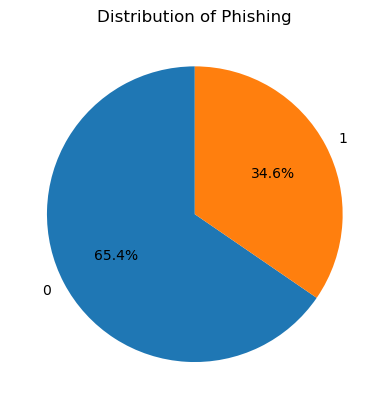

In [23]:
# Binary count from column phishing
binary_counts = df['phishing'].value_counts()

# Create the pie chart
plt.pie(binary_counts, labels=binary_counts.index,autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Phishing')

# Display the chart
plt.show()

In [24]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((53740, 25), (13435, 25), (53740,), (13435,))

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= .8)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_train_resampled.shape, y_train_resampled.shape

((66011, 25), (66011,))

# Model Training

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [27]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC()
}

In [28]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
        report = {}
        for i in range(len(models)):
            model = list(models.values())[i]
            # Train model
            model.fit(X_train,y_train)

            # Predict Testing data
            y_test_pred =model.predict(X_test)

            # Get scores for train and test data
            test_model_score = accuracy_score(y_test,y_test_pred)

            report[list(models.keys())[i]] = {
                "accuracy": test_model_score,
                "precision": precision_score(y_test, y_test_pred),
                "recall": recall_score(y_test, y_test_pred),
                "f1_score": f1_score(y_test, y_test_pred),
            }

        return report

In [29]:
model_report=evaluate_model(X_train_resampled,y_train_resampled,X_test_scaled,y_test,models)

In [30]:
for key, value in model_report.items():
    print(f"{key}: {value}")

LogisticRegression: {'accuracy': 0.9284704131001117, 'precision': 0.8553513513513513, 'recall': 0.931261770244821, 'f1_score': 0.8916939028513469}
DecisionTreeClassifier: {'accuracy': 0.9586899888351321, 'precision': 0.9273316361953251, 'recall': 0.9432674199623352, 'f1_score': 0.9352316489672075}
RandomForestClassifier: {'accuracy': 0.9702270189802754, 'precision': 0.9493227463801962, 'recall': 0.9569209039548022, 'f1_score': 0.9531066822977725}
SVC: {'accuracy': 0.9576479344994417, 'precision': 0.9204571428571429, 'recall': 0.9479755178907722, 'f1_score': 0.9340136843325989}


# Finding the Best Model

In [31]:
best_model_name = ""
best_model_score = 0

for model_name, model_scores in model_report.items():
    if model_scores["accuracy"] > best_model_score:
        best_model_name = model_name
        best_model_score = model_scores["accuracy"]

print(f"Best model name: {best_model_name}")
print(f"Best model score: {best_model_score}")

Best model name: RandomForestClassifier
Best model score: 0.9702270189802754


# Hyper Parameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

# Create the Random Forest Classifier
rfc = RandomForestClassifier()

# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [ 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found
best_params = grid_search.best_params_

# Create a new Random Forest Classifier with the best hyperparameters
best_rfc = RandomForestClassifier(**best_params)

# Fit the best model to the training data
best_rfc.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_rfc.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy, "Recall Score:", recall_score(y_test, y_pred), "Precision:", precision_score(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9708969110532192 Recall Score: 0.9590395480225988 Precision: 0.9494290375203915


# Clustering 

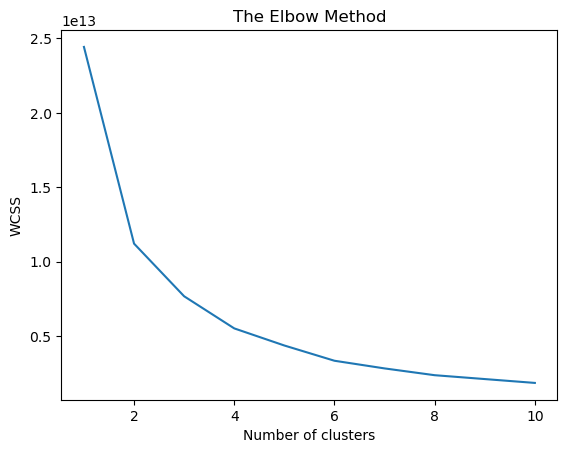

In [33]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
# To find how many clusters to make we will use elbow_plot method 

wcss=[] # Initializing an empty list to save Within Cluster Sum Squares for number of clusters formed
for i in range (1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
        kmeans.fit(X) # fitting the data to the KMeans Algorithm
        wcss.append(kmeans.inertia_)
            
            
plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# To find the value of the optimum clusters we will use the KneeLocator 
# Will find the point where the steep decrease in wcss is diminished
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
number_of_clusters = kn.knee
number_of_clusters

3

In [35]:
# Now let's create clusters using optimum number of clusters

kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(X) #  divide data into clusters

X['Cluster'] = kmeans_clusters  # create a new column in dataset for storing the cluster information

In [36]:
dfc = pd.concat([X,y], axis=1)
# Create a list to store DataFrames for each cluster
cluster_dataframes = []

# Iterate through each cluster label and create a DataFrame for each
for label in range(kmeans.n_clusters):
    cluster_df = dfc[dfc['Cluster'] == label].copy()
    cluster_dataframes.append(cluster_df)

# Remove the 'Cluster' column from each cluster DataFrame if needed
for cluster_df in cluster_dataframes:
    cluster_df.drop('Cluster', axis=1, inplace=True)

In [37]:

# Initialize dictionaries to store the best model and its accuracy for each cluster
best_models = {}
best_accuracies = {} 
# Iterate through each cluster
for i, cluster_df in enumerate(cluster_dataframes):
    # Split the data into features (X) and target (y)
    X = cluster_df.drop('phishing', axis=1)
    y = cluster_df['phishing']
    # Split the data into training and testing sets for the current cluster
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    best_model = None
    best_accuracy = 0.0

    # Iterate through each model
    for model_name, model in models.items():
        # Fit the model to the data for the current cluster
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Check if the current model is the best for this cluster
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name

    # Store the best model and its accuracy for this cluster
    best_models[f'Cluster {i}'] = best_model
    best_accuracies[f'Cluster {i}'] = best_accuracy

# Display the best models and their accuracies for each cluster
for cluster, model in best_models.items():
    print(f'Best Model for {cluster}: {model}, Accuracy: {best_accuracies[cluster]}')

Best Model for Cluster 0: RandomForestClassifier, Accuracy: 0.9732107157137145
Best Model for Cluster 1: RandomForestClassifier, Accuracy: 0.9676910953506698
Best Model for Cluster 2: RandomForestClassifier, Accuracy: 0.9723541383989145


In [38]:

# Initialize dictionaries to store the best model and accuracy for each cluster
best_models = {}
best_accuracies = {}
confusion_matrices = {}

# Iterate through each cluster
for i, cluster_df in enumerate(cluster_dataframes):
    # Split the data into features (X) and target (y)
    X = cluster_df.drop('phishing', axis=1)
    y = cluster_df['phishing']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    best_model = None
    best_accuracy = 0.0
    best_confusion_matrix = None
    
    # Iterate through each model
    for model_name, model in models.items():
        # Fit the model to the data for the current cluster
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate the confusion matrix
        confusion = confusion_matrix(y_test, y_pred)
        
        # Check if the current model is the best for this cluster
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name
            best_confusion_matrix = confusion
    
    # Store the best model and accuracy for this cluster
    best_models[f'Cluster {i}'] = best_model
    best_accuracies[f'Cluster {i}'] = best_accuracy
    confusion_matrices[f'Cluster {i}'] = best_confusion_matrix

# Display the best models and their accuracies for each cluster
for cluster, model in best_models.items():
    print(f'Best Model for {cluster}: {model}, Accuracy: {best_accuracies[cluster]}')


Best Model for Cluster 0: RandomForestClassifier, Accuracy: 0.9738104758096762
Best Model for Cluster 1: RandomForestClassifier, Accuracy: 0.9653270291568163
Best Model for Cluster 2: RandomForestClassifier, Accuracy: 0.9674355495251018


In [39]:
# Initialize an empty confusion matrix with zeros
sum_cm = np.zeros((2, 2))  # n_classes should be defined as the number of classes in your problem

# Iterate through each cluster's confusion matrix and add it to the aggregate matrix
for cm in confusion_matrices.values():
    sum_cm += cm

In [40]:
cluster_acc=(sum_cm[0][0]+sum_cm[1][1])/sum_cm.sum()
cluster_tpr= sum_cm[1][1]/(sum_cm[1][1]+sum_cm[1][0])
cluster_precision= sum_cm[1][1]/(sum_cm[1][1]+sum_cm[0][1])

print("Cluster Accuracy: ", cluster_acc,"Cluster Recall Score: ", cluster_tpr, "Cluster Precision:", cluster_precision)

Cluster Accuracy:  0.9694105388508485 Cluster Recall Score:  0.9507058551261283 Cluster Precision: 0.9540176497909894
